# Student Marks Prediction with Linear Regression
## Task 1: Explore Supervised Machine Learning

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We use the data available at http://bit.ly/w-data.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Reading and Understanding the Dataset:

In [2]:
#Import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("The data is imported successfully")
data

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

### Evaluation of Missing values

In [8]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required.

### DATA VISUALIZATION

Now let's plot 2D representation of our data in the form of graph so that it will give us clear idea about data.

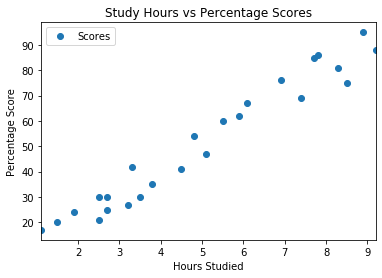

In [10]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

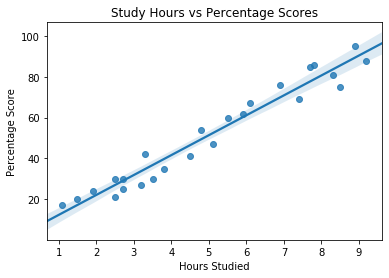

In [11]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

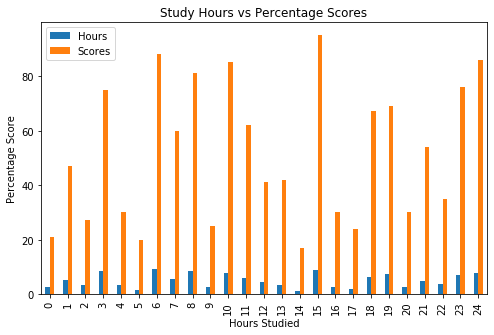

In [12]:
data.plot(kind='bar',figsize=(8,5))
plt.title('Study Hours vs Percentage Scores')   
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Linear Regression Model

Linear regression attempts to model the relationship between a dependent variable and one or more independent variables using a _straight line_ that best fits our data points.

A line can be represented as **`y = mx + b`**, where m is the slope of the line and b is the y-intercept, for a regression line:

$$m = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$b = \bar{y} - m\bar{x}$$

$$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$
$$\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$$

Now, we will prepare our data and split it in training and test datasets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
#Splitting training and testing data
X=data.iloc[:,:-1].values  #inputs
y=data.iloc[:,1].values    #output
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

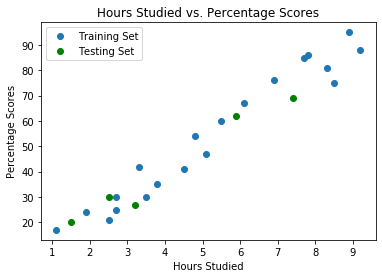

In [14]:
# Plotting data to understand relationship between the variables:

plt.plot(X_train, y_train, 'o', label = 'Training Set')
plt.plot(X_test, y_test, 'go', label = 'Testing Set')
plt.legend()
plt.title('Hours Studied vs. Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

Text(0.5, 1.0, 'Distribution of Scores')

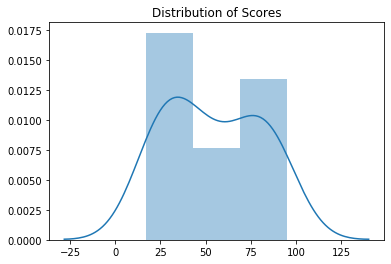

In [15]:
sns.distplot(y_train, kde=True)
plt.title('Distribution of Scores')

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [16]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


In [17]:
print ("Coefficient -", linearRegressor.coef_)
print ("Intercept - ", linearRegressor.intercept_)

Coefficient - [9.91065648]
Intercept -  2.018160041434683


### Checking the accuracy scores for training and test set

In [18]:
print('Test Score')
print(linearRegressor.score(X_test, y_test))
print('Training Score')
print(linearRegressor.score(X_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211553


### Predictions and Evaluation

In [19]:
print(X_test)
y_predict= linearRegressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted values
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


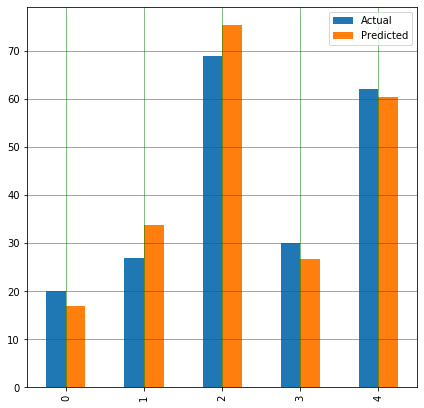

In [21]:
#plotting the grid to depict the actual and predicted value
data.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

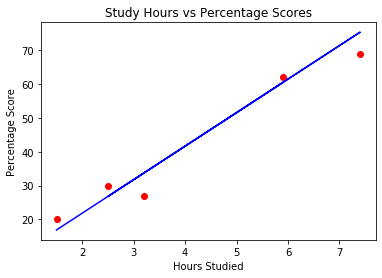

In [22]:
#visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test,  linearRegressor.predict(X_test), color= 'blue')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [23]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict)) 
print('Mean Squared Error: ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_predict)))
print('r2_score:',r2_score(y_test, y_predict))

Mean Absolute Error: 4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error: 4.6474476121003665
r2_score: 0.9454906892105356


R2 score gives the goodness of the fit and as can be seen it is 94.5% which is really good. This means that the algorithm has proven to be good for the given data.

It can also be said that the model's accuracy is 94.5%.

NOTE - In practice, you’ll never see a regression model with an R2 of 100%.

In [24]:
# You can also test with your own data
hours = [9.25]
own_pred = linearRegressor.predict([hours])
print("No of Hours: = {}".format(hours))
print("Predicted Score: = {}".format(own_pred[0]))

No of Hours: = [9.25]
Predicted Score: = 93.69173248737538


### Conclusion
We can see the value of the root mean squared error is 4.647 and the mean value of the percentages of all the students is 51.48. Here, root mean squared error is less than 10% of the mean value of the percenttages of all the student scores. Hence, it is safe to conclue the model did a decent job in predicting the score of 93.69 % when student studies for 9.25 hours.

## Thank you!